# Определение перспективного тарифа для телеком-компании

Мы представляем проект для компании «Мегалайн» — федерального оператора сотовой связи. 
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Нам необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

**Цель исследования** - проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Это позволит коммерческому департаменту скорректировать рекламный бюджет и в целом понять, какой тариф приносит больше денег.

**Описание тарифов**

*Тариф «Смарт»*
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

**Ход исследования**
Данные об активности клиентов мы получили из файлов:
* `/datasets/calls.csv` - информация о звонках;
* `/datasets/internet.csv` - информация об Интернет-сессиях;
* `/datasets/messages.csv` - информация о сообщениях;
* `/datasets/tariffs.csv` - информация о тарифах;
* `/datasets/users.csv` - информация о пользователях.
О качестве данных нам ничего неизвестно, поэтому перед проведением исследования понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование, затем, на этапе предобработки мы при необходимости постараемся исправить самые критичные ошибки данных, а также объединим данные из разных таблиц в одну и приведем к необходимым типам.

Затем мы проанализируем данные, используя методы статистики.

Мы сформулировали следующие гипотезы: 
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Проверим их на имеющихся данных.

Таким образом, решение пройдет в четыре этапа.




## Обзор данных

Составим представление о данных. Импортируем специальную библиотеку pandas для обработки и анализа данных. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy для математических вычислений
import matplotlib.pyplot as plt # импорт части библиотеки matplotlib
from scipy import stats as st


Прочитаем файл `/datasets/calls.csv` и сохраним его в переменной `df_calls`:

In [2]:
# чтение файла с данными и сохранение в df_calls
try:
    # _адрес в локальном окружении
    df_calls = pd.read_csv('calls.csv')
except:
    # адрес в среде 'practicum'
    df_calls = pd.read_csv('/datasets/calls.csv')

Выведем на экран первые пять строк таблицы

In [3]:
display(df_calls.head()) # получение первых 5 строк таблицы df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Аналогичным образом прочитаем остальные таблицы.

In [4]:
# чтение файла с данными и сохранение в df_internet
try:
    # _адрес в локальном окружении
    df_internet = pd.read_csv('internet.csv')
except:
    # адрес в среде 'practicum'
    df_internet = pd.read_csv('/datasets/internet.csv') 
display(df_internet.head()) # получение первых 5 строк таблицы df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Мы видим столбец с индексами строк. Сохраним его правильно 

In [5]:
# чтение файла с данными и сохранение в df_internet
try:
    # _адрес в локальном окружении
    df_internet = pd.read_csv('internet.csv', index_col=0)
except:
    # адрес в среде 'practicum'
    df_internet = pd.read_csv('/datasets/internet.csv', index_col=0) 
display(df_internet.head()) # получение первых 5 строк таблицы df_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
# чтение файла с данными и сохранение в df_messages
try:
    # _адрес в локальном окружении
    df_messages = pd.read_csv('messages.csv')
except:
    # адрес в среде 'practicum'
    df_messages = pd.read_csv('/datasets/messages.csv') 
display(df_messages.head()) # получение первых 5 строк таблицы df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
# чтение файла с данными и сохранение в df_tariffs
try:
    # _адрес в локальном окружении
    df_tariffs = pd.read_csv('tariffs.csv')
except:
    # адрес в среде 'practicum'
    df_tariffs = pd.read_csv('/datasets/tariffs.csv') 
display(df_tariffs) # получение таблицы df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
# чтение файла с данными и сохранение в df_users
try:
    # _адрес в локальном окружении
    df_users = pd.read_csv('users.csv')
except:
    # адрес в среде 'practicum'
    df_users = pd.read_csv('/datasets/users.csv') 
display(df_users.head()) # получение первых 5 строк таблицы df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Получим общую информацию о таблицах. Начнем с описания тарифов. 

In [9]:
df_tariffs.info() # получение общей информации о данных в таблице df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица `tariffs` (информация о тарифах)

В таблице 8 столбцов. Согласно документации к данным:
* `tariff_name` — название тарифа, тип данных - object;

У остальных столбцов тип данных -  int64:
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

В таблице всего 2 строки, пропущенных значений нет. 

***Примечание***
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примем, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

In [10]:
df_users.info() # получение общей информации о данных в таблице df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица `users` (информация о пользователях)

Всего в таблице 8 столбцов. Согласно документации к данным:

Тип int64:
* `user_id` — уникальный идентификатор пользователя;
* `age` — возраст пользователя (годы);

Тип object:
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tariff` — название тарифного плана.

Кроме столбца `churn_date`, где наличие пропущенных значений объяснимо, все остальные данные присутствуют. 
Однако необходимо привести столбцы `reg_date`, `churn_date` к формату "дата". 

In [11]:
df_calls.info() # получение общей информации о данных в таблице df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица `calls` (информация о звонках)

Всего в таблице 4 столбца. Согласно документации к данным:

* `id` — уникальный номер звонка - тип object;
* `call_date` — дата звонка - тип object;
* `duration` — длительность звонка в минутах - тип float64;
* `user_id` — идентификатор пользователя, сделавшего звонок - тип int64.

Количество записей одинаково, скорее всего пропущенных значений нет. Необходимо привести столбец `call_date` к формату "дата". 

In [12]:
df_messages.info() # получение общей информации о данных в таблице df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица `messages` (информация о сообщениях)

Всего в таблице 3 столбца. Согласно документации к данным: 
* `id` — уникальный номер сообщения - тип object;
* `message_date` — дата сообщения - тип object;
* `user_id` — идентификатор пользователя, отправившего сообщение - тип int64.

In [13]:
df_internet.info() # получение общей информации о данных в таблице df_internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Таблица `internet` (информация об интернет-сессиях):

Всего в таблице 5 столбцов, в документации есть информация о 4: 

* `id` — уникальный номер сессии, тип данных - object;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах), тип данных - float64;
* `session_date` — дата интернет-сессии, тип данных - object;
* `user_id` — идентификатор пользователя, тип данных - object;

Еще один столбец не имеет названия, содержит данные в формате int64, необходимо будет уточнить его содержание. 
Столбец `id` содержит данные в формате object, это не соответствует его содержанию. Возможно, безымянный столбец как раз содержит id пользователя, а в столбце `id` какие-то иные данные.

Также необходимо привести данные в столбце `session_date` к типу "дата". 

**Выводы**

Данные об активности клиентов мобильного оператора разделены по 5 таблицам. 
В них содержатся информация о тарифах, характеристиках пользователей и их активности: звонках, сообщениях, интернет-сессиях. Для достижения целей исследования данные необходимо будет объединить, но перед этим совершить предобработку: привести данные к необходимым форматам, решить вопрос с безымянным столбцом в таблице df_internet и убедиться в качестве данных. 

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Исключим пропуски данных и дубликаты, проверим данные на наличие аномалий и при необходимости избавимся от них. 
Приведем данные к необходимым типам.

### Проверка данных на аномалии и исправления

Проверим данные на аномалии. Сначала - оценим общую картину с помощью метода describe. Так мы увидим количество значений, минимальное и максиальное значение по столбцам и некоторые другие сведения по таблицам.

In [14]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [15]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В данных мы видим звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

In [16]:
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [17]:
df_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


Рассмотрев характеристику данных, признаем, что особых аномалий в таблицах нет, качество данных высоко.

### Изменение типов данных.

Приведем данные в следующих столбцах, где дата сохранена в формате строки к формату даты:
* Таблица users (информация о пользователях), `reg_date` — дата подключения тарифа (день, месяц, год);
* Таблица users (информация о пользователях),`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* Таблица calls (информация о звонках) — `call_date` — дата звонка;
* Таблица messages (информация о сообщениях) — `message_date` — дата сообщения;
* Таблица internet (информация об интернет-сессиях) — `session_date` — дата интернет-сессии.

Теперь заменим формат в таблице users.

In [18]:
# Перевод столбца из строки в дату и время
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

# Проверка успешности замены - запрос информации обо всех столбцах и первых пяти строк таблицы
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Замена произведена успешно. Проведем замену в таблицах calls, messages и internet.

In [19]:
# Перевод столбца из строки в дату и время
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# Проверка успешности замены - запрос информации обо всех столбцах и первых пяти строк таблицы
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [20]:
# Перевод столбца из строки в дату и время
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# Проверка успешности замены - запрос информации обо всех столбцах и первых пяти строк таблицы
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
# Перевод столбца из строки в дату и время
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# Проверка успешности замены - запрос информации обо всех столбцах и первых пяти строк таблицы
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Замена также произведена успешно. Теперь данные в необходимых форматах.

### Расчет и добавление столбцов в таблицы

Так как нам необходимо произвести помесячный расчет, дополнительно рассчитаем:
* информацию о том, является ли город клиента столицей - is_capital;
* округленную в соответствии с правилами компаниями длительность звонка в минутах - duration_min;
* месяц для звонков - call_month;
* месяц для сообщений - message_month;
* месяц для Интернет-сессий - session_month.

Начнем с таблицы users

In [22]:
# С помощью метода where присвоим клиентам не из Москвы "0", а из столицы - "1"
df_users['is_capital'] = df_users['city'].where(df_users['city'] == 'Москва', other=0)
df_users['is_capital'] = df_users['is_capital'].where(df_users['is_capital'] == 0, other=1)
# Приведем данные к булеву формату
df_users['is_capital'] = df_users['is_capital'].astype('bool')
# Проверка - запрос первых пяти строк таблиц
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,is_capital
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,False
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,True
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,False
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,True
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,False


Перейдем к таблице calls. Создадим столбцы с округленным временем минут и с информацией о месяце.

In [23]:
# C помощью функции ceil из модуля math округлим минуты в большую сторону
df_calls['duration_min'] = np.ceil(df_calls['duration'])
# Создание столбца через запрос формата "месяц и год"
df_calls['month'] = df_calls['call_date'].astype('datetime64[M]')

# Проверка - запрос первых пяти строк таблиц
df_calls.head()

,id,call_date,duration,user_id,duration_min,month
0,1000_0,2018-07-25,0.00,1000,0.0,2018-07-01
1,1000_1,2018-08-17,0.00,1000,0.0,2018-08-01
2,1000_2,2018-06-11,2.85,1000,3.0,2018-06-01
3,1000_3,2018-09-21,13.80,1000,14.0,2018-09-01
4,1000_4,2018-12-15,5.18,1000,6.0,2018-12-01


Округленные данные относятся к целочисленному типу. Преобразуем тип данных столбца.

In [24]:
# Преобразование в целочисленный тип
df_calls['duration_min'] = df_calls['duration_min'].astype(int)
# Проверка успешности преобразования - запрос информации обо всех столбцах
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            202607 non-null  object        
 1   call_date     202607 non-null  datetime64[ns]
 2   duration      202607 non-null  float64       
 3   user_id       202607 non-null  int64         
 4   duration_min  202607 non-null  int64         
 5   month         202607 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 9.3+ MB


Теперь добавим столбец с информацией о месяце в таблицу messages.

In [25]:
# Создание столбца через запрос формата "месяц и год"
df_messages['month'] = df_messages['message_date'].astype('datetime64[M]')

# Проверка - запрос первых пяти строк таблиц
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


Наконец добавим столбец с информацией о месяце в таблицу с данными Интернет-сессий.

In [26]:
# Создание столбца через запрос формата "месяц и год"
df_internet['month'] = df_internet['session_date'].astype('datetime64[M]')

# Проверка - запрос первых пяти строк таблиц
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,1000_4,302.56,2018-09-24,1000,2018-09-01


Мы успешно добавили столбцы во все три таблицы. 
Теперь наши данные подготовлены к созданию сводной таблице по активности клиентов.

### Объединение данных в итоговую таблицу

Посчитаем для каждого пользователя:
- количество сделанных звонков по месяцам,
- количество израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Для подсчета выручки вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

Начнем с информации о звонках.

In [27]:
# Создание сводной таблицы по звонкам
call_stats = df_calls.pivot_table(
    index = ['user_id', 'month'], 
    values = 'duration_min', 
    aggfunc=['count','sum']
)
# Переименование столбца
call_stats.columns = ['_'.join(col) for col in call_stats.columns.values]
call_stats = call_stats.rename(
    columns = {'count_duration_min': 'calls_count', 'sum_duration_min': 'calls_duration'}
)
# Проверка - запрос первых пяти строк таблицы
call_stats.head()

calls_count  calls_duration
user_id month                                  
1000    2018-05-01           22             159
        2018-06-01           43             172
        2018-07-01           47             340
        2018-08-01           52             408
        2018-09-01           58             466

Добавим информацию о сообщениях. Сначала создадим соответствующую таблицу. 

In [28]:
# Создание сводной таблицы по сообщениям
message_stats = df_messages.pivot_table(
    index = ['user_id', 'month'], 
    values = 'id', 
    aggfunc=['count']
)
# Переименование столбца
message_stats.columns = ['_'.join(col) for col in message_stats.columns.values]
message_stats = message_stats.rename(columns = {'count_id': 'messages_count'})
# Проверка - запрос первых пяти строк таблицы
message_stats.head()

messages_count
user_id month                     
1000    2018-05-01              22
        2018-06-01              60
        2018-07-01              75
        2018-08-01              81
        2018-09-01              57

Обработаем информацию об интернет-сессиях: объединим по месяцам и переведем объем данных в гигабайты по правилам оператора. 

In [29]:
# Создание сводной таблицы 
internet_stats = df_internet.pivot_table(
    index = ['user_id', 'month'], 
    values = 'mb_used', 
    aggfunc=['sum']
)
# Объединение уровней заголовков
internet_stats.columns = ['_'.join(col) for col in internet_stats.columns.values]

# Перевод в гигабайты: деление на 1024 и округление в большую сторону по правилам оператора
internet_stats['gb_used'] = np.ceil(internet_stats['sum_mb_used'] / 1024)

# Удалим ненужную колонку с информацией о трафике в мегабайтах
internet_stats.drop('sum_mb_used', axis=1, inplace=True)
# internet_stats = internet_stats.rename(columns = {'sum_mb_used': 'mb_sum'})
# Проверка - запрос первых пяти строк таблицы
internet_stats.head()

gb_used
user_id month              
1000    2018-05-01      3.0
        2018-06-01     23.0
        2018-07-01     14.0
        2018-08-01     14.0
        2018-09-01     15.0

Все таблицы подготовлены. Теперь можно их объединить в одну. 

In [30]:
# Объединяем таблицы звонков и сообщений по 'user_id' и месяцу. 
stats_full = pd.merge(call_stats, message_stats, on=['user_id', 'month'], how='outer')
# Добавляем к объединенной таблице данные по интернет-сессиям
stats_full = pd.merge(stats_full, internet_stats, on=['user_id', 'month'], how='outer')

# Проверка - запрос первых пяти строк таблицы
stats_full.head()

calls_count  calls_duration  messages_count  gb_used
user_id month                                                           
1000    2018-05-01         22.0           159.0            22.0      3.0
        2018-06-01         43.0           172.0            60.0     23.0
        2018-07-01         47.0           340.0            75.0     14.0
        2018-08-01         52.0           408.0            81.0     14.0
        2018-09-01         58.0           466.0            57.0     15.0

Заполним пропуски в полях с количеством и длительностью звонков, количеством смс и гигабайт значением "0" - если в некоторых таблицах данных нет, значит эти виды связи не использовались.  

In [31]:
# Заполнение пропущенных данных значением "0"
stats_full = stats_full.fillna(0)
# Проверка - запрос суммы пропущенных значений по колонкам
stats_full.isna().sum()

calls_count       0
calls_duration    0
messages_count    0
gb_used           0
dtype: int64

Добавим к таблице информацию о виде тарифа и о том, живет ли клиент в столице из таблицы users.

In [32]:
# Объединение таблицы stats и некоторых столбцов с информацией о пользователях.
stats_full = pd.merge(stats_full, df_users[['user_id', 'is_capital','tariff']], on='user_id')
# Проверка - запрос первых пяти строк таблицы
stats_full.head()

,user_id,calls_count,calls_duration,messages_count,gb_used,is_capital,tariff
0,1000,22.0,159.0,22.0,3.0,False,ultra
1,1000,43.0,172.0,60.0,23.0,False,ultra
2,1000,47.0,340.0,75.0,14.0,False,ultra
3,1000,52.0,408.0,81.0,14.0,False,ultra
4,1000,58.0,466.0,57.0,15.0,False,ultra


Для проведения расчетов объединим получившуюся таблицу и таблицу с информацией о тарифах.

In [33]:
# Объединение таблицы с информацией о тарифах
stats_full = stats_full.join(df_tariffs.set_index('tariff_name'), how='left', on='tariff')
# Проверка - запрос первых пяти строк таблицы
stats_full.head()

,user_id,calls_count,calls_duration,messages_count,gb_used,is_capital,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,22.0,159.0,22.0,3.0,False,ultra,1000,30720,3000,1950,150,1,1
1,1000,43.0,172.0,60.0,23.0,False,ultra,1000,30720,3000,1950,150,1,1
2,1000,47.0,340.0,75.0,14.0,False,ultra,1000,30720,3000,1950,150,1,1
3,1000,52.0,408.0,81.0,14.0,False,ultra,1000,30720,3000,1950,150,1,1
4,1000,58.0,466.0,57.0,15.0,False,ultra,1000,30720,3000,1950,150,1,1


In [34]:
# Расчет дохода по правилам тарифа
stats_full['revenue'] = (
    stats_full.calls_duration > stats_full.minutes_included) * (
    (stats_full.calls_duration - stats_full.minutes_included) * stats_full.rub_per_minute) + (
    stats_full.messages_count > stats_full.messages_included) * (
    (stats_full.messages_count - stats_full.messages_included) * stats_full.rub_per_message) +(
    stats_full.gb_used > stats_full.mb_per_month_included / 1024) * (
    (stats_full.gb_used - stats_full.mb_per_month_included / 1024) * stats_full.rub_per_gb
) +stats_full.rub_monthly_fee

# Проверка - запрос первых 10 строк таблицы
stats_full.head(10)

,user_id,calls_count,calls_duration,messages_count,gb_used,is_capital,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,22.0,159.0,22.0,3.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,43.0,172.0,60.0,23.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,47.0,340.0,75.0,14.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52.0,408.0,81.0,14.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,58.0,466.0,57.0,15.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,57.0,350.0,73.0,15.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,43.0,338.0,58.0,15.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,46.0,333.0,70.0,10.0,False,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1001,59.0,430.0,0.0,18.0,True,smart,50,15360,500,550,200,3,3,1150.0
9,1001,63.0,414.0,0.0,14.0,True,smart,50,15360,500,550,200,3,3,550.0


Мы рассчитали ежемесячный доход от каждого пользователя. Теперь сохраним результаты в компактную таблицу с только необходимыми для анализа колонками.

In [35]:
# Создание новой таблицы с главными колонками из общей таблицы для анализа
stats = stats_full[[
    'user_id', 
    'calls_count', 
    'calls_duration', 
    'messages_count', 
    'gb_used', 
    'revenue', 
    'is_capital', 
    'tariff' ]] 
print('Всего записей в таблице с информацией об активности клиентов -', len(stats))
# Проверка - запрос первых 5 строк таблицы
stats.head()

Всего записей в таблице с информацией об активности клиентов - 3214


,user_id,calls_count,calls_duration,messages_count,gb_used,revenue,is_capital,tariff
0,1000,22.0,159.0,22.0,3.0,1950.0,False,ultra
1,1000,43.0,172.0,60.0,23.0,1950.0,False,ultra
2,1000,47.0,340.0,75.0,14.0,1950.0,False,ultra
3,1000,52.0,408.0,81.0,14.0,1950.0,False,ultra
4,1000,58.0,466.0,57.0,15.0,1950.0,False,ultra


Создадим также две отдельных таблицы с информацией по пользователям разных тарифов.

In [36]:
# Создание таблицы с выборкой по тарифу
stats_ultra = stats.query('tariff == "ultra"')
print('Всего записей в таблице с информацией об абонентах тарифа ultra - ', len(stats_ultra))
# Проверка - запрос первых 5 строк таблицы
stats_ultra.head()

Всего записей в таблице с информацией об абонентах тарифа ultra -  985


,user_id,calls_count,calls_duration,messages_count,gb_used,revenue,is_capital,tariff
0,1000,22.0,159.0,22.0,3.0,1950.0,False,ultra
1,1000,43.0,172.0,60.0,23.0,1950.0,False,ultra
2,1000,47.0,340.0,75.0,14.0,1950.0,False,ultra
3,1000,52.0,408.0,81.0,14.0,1950.0,False,ultra
4,1000,58.0,466.0,57.0,15.0,1950.0,False,ultra


Таблица с информацией об активности абонентов ultra создана. Создадим такую же таблицу по тарифу smart.

In [37]:
# Создание таблицы с выборкой по тарифу
stats_smart = stats.query('tariff == "smart"')
print('Всего записей в таблице с информацией об абонентах тарифа smart - ', len(stats_smart))
# Проверка - запрос первых 5 строк таблицы
stats_smart.head()

Всего записей в таблице с информацией об абонентах тарифа smart -  2229


,user_id,calls_count,calls_duration,messages_count,gb_used,revenue,is_capital,tariff
8,1001,59.0,430.0,0.0,18.0,1150.0,True,smart
9,1001,63.0,414.0,0.0,14.0,550.0,True,smart
10,1002,15.0,117.0,4.0,11.0,550.0,False,smart
11,1002,26.0,214.0,11.0,18.0,1150.0,False,smart
12,1002,42.0,289.0,13.0,20.0,1550.0,False,smart


Таблица с информацие по активности абонентов тарифа smart также готова. Их гораздо больше. Теперь данные готовы к анализу. Мы можем сравнить тарифы и выбрать наиболее прибыльный.

## Исследовательский анализ

Опишем поведение клиентов оператора, исходя из выборки. 
Для этого посчитаем среднее количество, дисперсию и стандартное отклонение показателей основных видов связи:
- сколько минут разговора, 
- сколько сообщений 
- какой объём интернет-трафика 

требуется пользователям каждого тарифа в месяц? 
 
Построим гистограммы и опишем распределение.

### Голосовая связь

Изучим основные параметры времени разговоров. Рассчитаем среднее, дисперсию и стандартное отклонение.

Для абонентов тарифа 'ultra' cреднее количество минут в месяц - 526.6 , а медианное - 518.0
Для абонентов тарифа 'ultra' общая дисперсия - 100873.6
Для абонентов тарифа 'ultra' cтандартное отклонение - 317.6


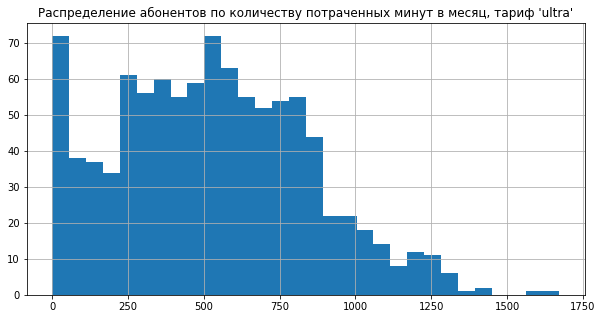

In [38]:
# Расчет мер дисперсии и среднего с помощью пакета numpy
calls_ultra_mean = stats_ultra['calls_duration'].mean()
calls_ultra_median = stats_ultra['calls_duration'].median()
calls_ultra_var = stats_ultra['calls_duration'].var()
calls_ultra_std = stats_ultra['calls_duration'].std()
print(f'Для абонентов тарифа \'ultra\' cреднее количество минут в месяц - {calls_ultra_mean:.1f} , а медианное - {calls_ultra_median:.1f}')
print(f'Для абонентов тарифа \'ultra\' общая дисперсия - {calls_ultra_var:.1f}')
print(f'Для абонентов тарифа \'ultra\' cтандартное отклонение - {calls_ultra_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
stats_ultra['calls_duration'].hist(bins=30, color='tab:blue', figsize=(10,5))
plt.title('Распределение абонентов по количеству потраченных минут в месяц, тариф \'ultra\'')
plt.grid(True)
plt.show()

Для абонентов тарифа ultra среднее колиество минут разговора в месяц - около 526, то есть поти 9 часов. Медианное и среднее знаение близки, Для распределения характерна высокая дисперсия и значительное стандартное отклонение. По форме распределения можно выделить несколько пиков - это может говорить о том, что среди абонентов этого тарифа можно выделить несколько разнородных групп. Среди пользователей тарифа есть значительная доля абонентов, вообще не использующая голосовую связь и достаточное количество клиентов, разговаривающих свыше 1000 минут в месяц.  

Для абонентов тарифа 'smart' cреднее количество минут в месяц - 417.9 , а медианное - 422.0
Для абонентов тарифа 'smart' общая дисперсия - 36219.3
Для абонентов тарифа 'smart' cтандартное отклонение - 190.3


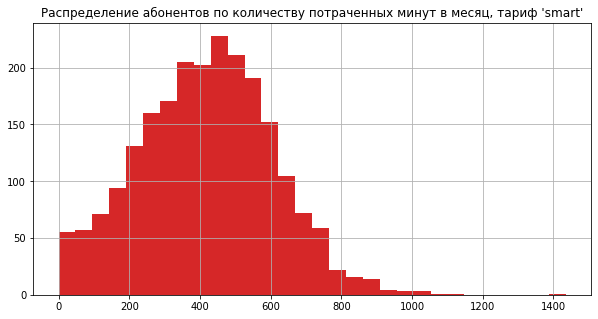

In [39]:
# Расчет мер дисперсии и среднего с помощью пакета numpy
calls_smart_mean = stats_smart['calls_duration'].mean()
calls_smart_median = stats_smart['calls_duration'].median()
calls_smart_var = stats_smart['calls_duration'].var()
calls_smart_std = stats_smart['calls_duration'].std()
print(f'Для абонентов тарифа \'smart\' cреднее количество минут в месяц - {calls_smart_mean:.1f} , а медианное - {calls_smart_median:.1f}')
print(f'Для абонентов тарифа \'smart\' общая дисперсия - {calls_smart_var:.1f}')
print(f'Для абонентов тарифа \'smart\' cтандартное отклонение - {calls_smart_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
stats_smart['calls_duration'].hist(bins=30, color='tab:red', figsize=(10,5))
plt.title('Распределение абонентов по количеству потраченных минут в месяц, тариф \'smart\'')
plt.grid(True)
plt.show()

В среднем абоненты тарифа тарифа smart тратят около 417 минут голосовой связи в месяц. По форме распределение ближе к "колоколу" нормального распределения, дисперсия выборки меньше, как и стандартное отклонение.Это может говорить о том, что состав абонентов в данном тарифном плане более "гомогенный", единообразный.

### Сообщения

Рассмотрим пользование сообщениями. 

Для абонентов тарифа 'ultra' cреднее количество сообщений в месяц - 49.4 , а медианное - 38.0
Для абонентов тарифа 'ultra' общая дисперсия количества сообщений - 2285.3
Для абонентов тарифа 'ultra' cтандартное отклонение количества сообщений - 47.8


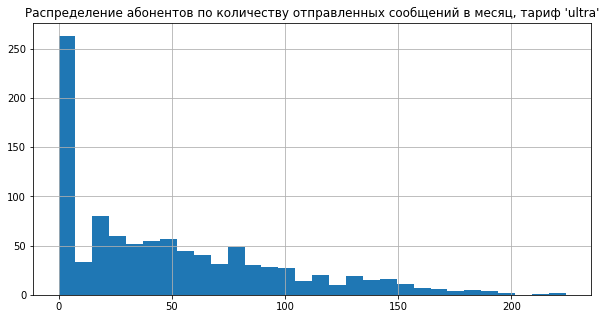

In [40]:
# Расчет мер дисперсии и среднего с помощью пакета numpy
messages_ultra_mean = stats_ultra['messages_count'].mean()
messages_ultra_median = stats_ultra['messages_count'].median()
messages_ultra_var = stats_ultra['messages_count'].var()
messages_ultra_std = stats_ultra['messages_count'].std()
print(f'Для абонентов тарифа \'ultra\' cреднее количество сообщений в месяц - {messages_ultra_mean:.1f} , а медианное - {messages_ultra_median:.1f}')
print(f'Для абонентов тарифа \'ultra\' общая дисперсия количества сообщений - {messages_ultra_var:.1f}')
print(f'Для абонентов тарифа \'ultra\' cтандартное отклонение количества сообщений - {messages_ultra_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
stats_ultra['messages_count'].hist(bins=30, color='tab:blue', figsize=(10,5))
plt.title('Распределение абонентов по количеству отправленных сообщений в месяц, тариф \'ultra\'')
plt.grid(True)
plt.show()

Среди абонентов тарифа ultra значительная доля не пользуется сообщениями вообще. Среднее количество отпрвленных сообщений - около 49. При этом медианное значение значительно меньше среднего арифметического - 38. Это связано как раз с большим количеством не отправляющих сообщения клиентов. Стандартное отклонение близко к среднему значению, дисперсия значительная - в плане пользования сообщениями пользователи тарифа ultra достаточно неоднородны.

Для абонентов тарифа 'smart' cреднее количество сообщений в месяц - 33.4 , а медианное - 28.0
Для абонентов тарифа 'smart' общая дисперсия количества сообщений - 796.8
Для абонентов тарифа 'smart' cтандартное отклонение количества сообщений - 28.2


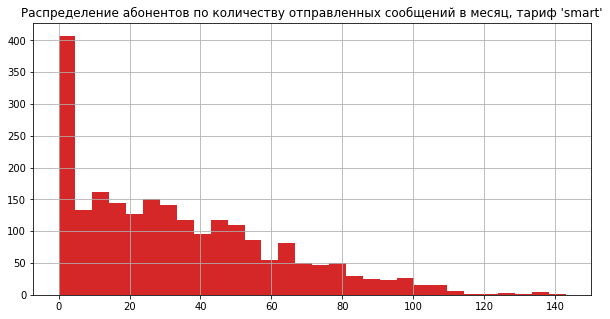

In [41]:
# Расчет мер дисперсии и среднего с помощью пакета numpy
messages_smart_mean = stats_smart['messages_count'].mean()
messages_smart_median = stats_smart['messages_count'].median()
messages_smart_var = stats_smart['messages_count'].var()
messages_smart_std = stats_smart['messages_count'].std()
print(f'Для абонентов тарифа \'smart\' cреднее количество сообщений в месяц - {messages_smart_mean:.1f} , а медианное - {messages_smart_median:.1f}')
print(f'Для абонентов тарифа \'smart\' общая дисперсия количества сообщений - {messages_smart_var:.1f}')
print(f'Для абонентов тарифа \'smart\' cтандартное отклонение количества сообщений - {messages_smart_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
stats_smart['messages_count'].hist(bins=30, color='tab:red', figsize=(10,5))
plt.title('Распределение абонентов по количеству отправленных сообщений в месяц, тариф \'smart\'')
plt.grid(True)
plt.show()

Среди абонетов тарифа smart также значительная часть не пользуется сообщениями вообще, однако в целом распределение более однородное - дисперсия и стандартное отклонение знаительно ниже, чем у тарифа ultra. 

### Пользование интернет-трафиком

Рассмотрим особенности использования мобильного интернета пользователями разных тарифов.

Для абонентов тарифа 'ultra' cреднее количество использованных гигабайт Интернет-трафика в месяц - 19.5 , а медианное - 19.0
Для абонентов тарифа 'ultra' общая дисперсия количества  использованных гигабайт Интернет-трафика - 97.1
Для абонентов тарифа 'ultra' cтандартное отклонение  использованных гигабайт Интернет-трафика - 9.9


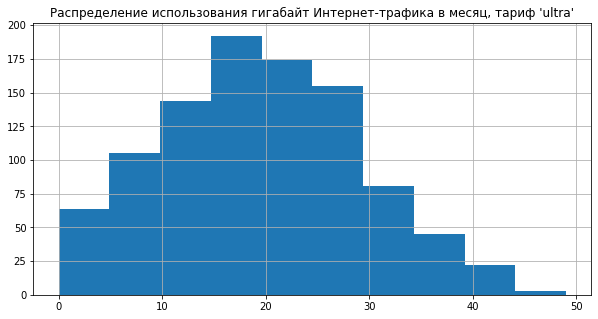

In [42]:
# Расчет мер дисперсии и среднего с помощью пакета numpy
internet_ultra_mean = stats_ultra['gb_used'].mean()
internet_ultra_median = stats_ultra['gb_used'].median()
internet_ultra_var = stats_ultra['gb_used'].var()
internet_ultra_std = stats_ultra['gb_used'].std()
print(f'Для абонентов тарифа \'ultra\' cреднее количество использованных гигабайт Интернет-трафика в месяц - {internet_ultra_mean:.1f} , а медианное - {internet_ultra_median:.1f}')
print(f'Для абонентов тарифа \'ultra\' общая дисперсия количества  использованных гигабайт Интернет-трафика - {internet_ultra_var:.1f}')
print(f'Для абонентов тарифа \'ultra\' cтандартное отклонение  использованных гигабайт Интернет-трафика - {internet_ultra_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
stats_ultra['gb_used'].hist(bins=10, color='tab:blue', figsize=(10,5))
plt.title('Распределение использования гигабайт Интернет-трафика в месяц, тариф \'ultra\'')
plt.grid(True)
plt.show()

Распределение пользования интернет-трафиком в тарифе ultra близко к нормальному. Среднее арифметическое количество использованного трафика ежемесячно для этого тарифа составляет 19.5 гигабайт, а медианное - 19. Близость средних мер подтвердает близость распределения по форме к нормальному. 


Для абонентов тарифа 'smart' cреднее количество использованных гигабайт Интернет-трафика в месяц - 16.3 , а медианное - 17.0
Для абонентов тарифа 'smart' общая дисперсия количества  использованных гигабайт Интернет-трафика - 33.0
Для абонентов тарифа 'smart' cтандартное отклонение  использованных гигабайт Интернет-трафика - 5.7


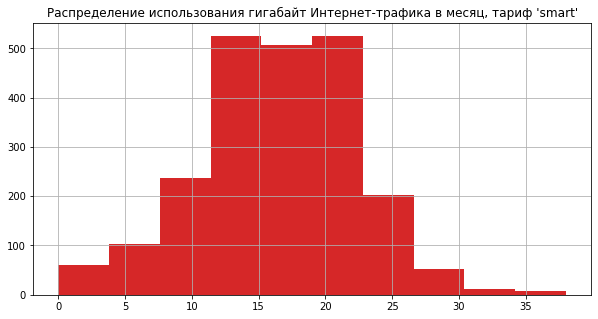

In [43]:
# Расчет мер дисперсии и среднего с помощью пакета numpy
internet_smart_mean = stats_smart['gb_used'].mean()
internet_smart_median = stats_smart['gb_used'].median()
internet_smart_var = stats_smart['gb_used'].var()
internet_smart_std = stats_smart['gb_used'].std()
print(f'Для абонентов тарифа \'smart\' cреднее количество использованных гигабайт Интернет-трафика в месяц - {internet_smart_mean:.1f} , а медианное - {internet_smart_median:.1f}')
print(f'Для абонентов тарифа \'smart\' общая дисперсия количества  использованных гигабайт Интернет-трафика - {internet_smart_var:.1f}')
print(f'Для абонентов тарифа \'smart\' cтандартное отклонение  использованных гигабайт Интернет-трафика - {internet_smart_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
stats_smart['gb_used'].hist(bins=10, color='tab:red', figsize=(10,5))
plt.title('Распределение использования гигабайт Интернет-трафика в месяц, тариф \'smart\'')
plt.grid(True)
plt.show()

Распределение пользователей Интернетом по объему трафика в тарифе smart также близко к нормальному по форме. В среднем абоненты этого тарифа расходуют 16 Гигабайт интернет-трафика, при этом стандартное отклонение и дисперсия невелики.

###### Вывод:

Мы видим, что пользователи тарифа ultra в среднем активнее пользуются всеми видами связи, чем пользователи тарифа smart. Средние значения по всем видам связи у абонентов тарифа ultra выше. Кроме того, стандартное отклонение и дисперсия по всем показателям у абонентов тарифа smart ниже - эта группа более гомогенна. 
Однако мы не можем ответить на вопрос, носят ли эти отличия случайный характер, либо они статистически значимы без проверки гипотез. 

## Проверка гипотез

Сформулируем нулевые и альтернативные гипотезы для нашего исследования:
1. 
- Н0(нулевая гипотеза): Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны между собой
- Н1(альтернативная гипотеза): Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

2. 
- Н0(нулевая гипотеза) средняя выручка пользователей из Москвы и из других регионов равны между собой
- Н1(альтернативная гипотеза): Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha примем равным 0.5.

Мы формулировали гипотезы исходя из положения, что нулевая гипотеза предполагает использование знака равенства - она предполагает сохранение "статуса кво" - в нашем случае тарифный план (или регион) не влияют на выручку пользователей. 
Альтернативные гипотезы формулируются таким образом, чтобы оценить влияние факторов, в нашем случае тариф (или регион) на выручку пользователей. Альтернативные гипотезы в обоих случаях "двусторонние" - то есть нас интересует любой исход: в вопросе тарифов и ситуация, когда тариф «Смарт» более прибыльный, и когда  «Ультра» более прибыльный.
Для проверки гипотез мы используем критерий Пирсона. 
Он позволяет охарактеризовать попадание в двустороннюю критическую область.
Он характеризует достигнутый уровень значимости и позволяет отвергнуть (или не отвергнуть) нулевую гипотезу.

### Различается ли выручка пользователей разных тарифов?

Оценим, значимо ли различие выручки пользователей разных тарифов. 

In [44]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    stats_ultra['revenue'], 
    stats_smart['revenue'])

print(f'p-значение:, {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:, 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Различия настолько значительные, что даже при пороговом значении 0.01 нам пришлось бы отвергнуть нулевую гипотезу. Посмотрим, какой же тариф более выгодный.

Для абонентов тарифа 'ultra' cредняя выручка в месяц - 2070.2 рублей,
при дисперсии 141516.7 и стандартном отклонении 376.2
Для абонентов тарифа 'smart' cредняя выручка в месяц - 1290.0 рублей,
при дисперсии 669785.7 и стандартном отклонении 818.4


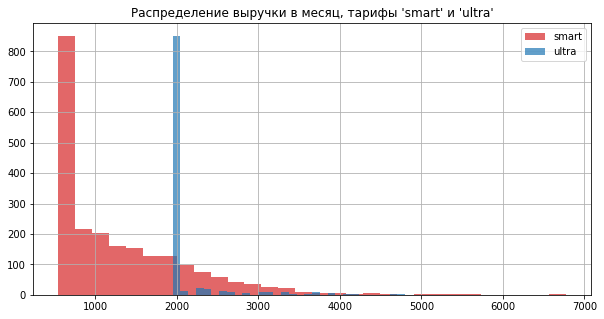

In [45]:
revenue_ultra_mean = stats_ultra['revenue'].mean()
revenue_ultra_var = stats_ultra['revenue'].var()
revenue_ultra_std = stats_ultra['revenue'].std()


revenue_smart_mean = stats_smart['revenue'].mean()
revenue_smart_var = stats_smart['revenue'].var()
revenue_smart_std = stats_smart['revenue'].std()

print(f'Для абонентов тарифа \'ultra\' cредняя выручка в месяц - {revenue_ultra_mean:.1f} рублей,\nпри дисперсии {revenue_ultra_var:.1f} и стандартном отклонении {revenue_ultra_std:.1f}')
print(f'Для абонентов тарифа \'smart\' cредняя выручка в месяц - {revenue_smart_mean:.1f} рублей,\nпри дисперсии {revenue_smart_var:.1f} и стандартном отклонении {revenue_smart_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
stats_smart['revenue'].hist(bins=30, color='tab:red',  alpha=0.7, figsize=(10,5), label='smart')
stats_ultra['revenue'].hist(bins=30, color='tab:blue', alpha=0.7, figsize=(10,5), label='ultra')
plt.title('Распределение выручки в месяц, тарифы \'smart\' и \'ultra\'')
plt.grid(True)
plt.legend()
plt.show()

Больше выручки приносит тариф ultra.

### Различается ли выручка пользователей в столице и регионах?

In [46]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    stats.query('is_capital == True')['revenue'],
    stats.query('is_capital != True')['revenue'])

print(f'p-значение:, {results.pvalue:.2f}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:, 0.54
Не получилось отвергнуть нулевую гипотезу


Значение критерия Пирсона слишком высоко - вероятность получить такое значение около 54%. Мы не можем отвергнуть нулевую гипотезу о том, что жители столицы и регионов в среднем приносят компании одинаковую выручку.

## Общий вывод:

Мы провели исследование по определению лучшего тарифа для продвижения.
Мы проанализировали поведение клиентов и увидели: 
- абоненты тарифа "Ультра" активнее пользуются всеми видами связи: звонки, сообщения, мобильный интернет, чем абоненты тарифа "Смарт",
- средняя выручка от клиентов разных тарифов существенно различается,
- средняя выручка клиента "Ультра" на 60% больше, чем клиента "Смарт". При этом за счет высокой абоненсткой платы, дисперсия (и соответственно стандартное отклонение) в выручке абонентов "Ультра" значительно меньше,
- средняя выручка клиентов в Москве и других регионах значимо не различается.

В силу того, что тарифы по своим параметрам в Москве и регионах не отличаются - абонентская плата и плата за минуты, сообщения и Интернет рассчитывается по одним ценам, то и выручка от пользователей значимо не различается.

Можно сделать вывод — для продвижение лучше тариф "Ультра". Пользователи там могут активнее использовать тот или иной вид связи достаточно активно, однако в результате и платят значительно больше, чем пользователи тарифа "Смарт". Порекомендуем коммерческому департаменту скорректировать рекламный бюджет в сторону данного тарифа.

